# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from scipy import stats
from sklearn import metrics
import glob
import csv
import os
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Check if GPU is available
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")
    
interesting_dir = "./"
#interesting_files = ["sit.csv", "stand.csv", "walk.csv"]
interesting_labels = ['crawl', 'ActiveDrowning','PassiveDrowning']
save_filename = "activity"

C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\farha\anaconda3\envs\tensorflow_gpu\l

Default GPU Device: /device:GPU:0


# Concate and label the raw data  

In [2]:
def data_concate_label(path,label):
    all_files1 = glob.glob(path + "/*.csv")
    
    li = []

    for filename in all_files1:
        df = pd.read_csv(filename, index_col=None, header=0)
        
        if 'label' in df.columns:
            pass
        else:df['label'] = str(label)
        li.append(df)
    frame = pd.concat(li, axis=0, ignore_index=True)
#     frame = frame.drop_duplicates()
    
    if len(df.columns) == 19 :
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','lx','ly','lz','mx','my','mz','ma','mg','ml','mm','label']
    
    else :
       
        new_header =['DATE','TIME','ax','ay','az','gx','gy','gz','ma','mg','label']
#     if label == 'fall':
#         frame = frame.drop_duplicates()
        
#         frame = frame.query("mg >= 10 ")
#     if label =='jump':
        
#         frame = frame.query("mg <= 6")
    
#     else : pass
    frame = frame[:18000]
    
    print(frame.shape)
    print(len(df.columns))
    #frame.to_csv("./Data/Fastest/activity_"+str(label)+".csv",index = False,header=new_header)
    frame.to_csv("./activity_"+str(label)+".csv",index = False,header=new_header)
    

In [3]:
path1 = r".\crawl"
label1 = "crawl"
path2 = r".\ActiveDrowning"
label2 = "ActiveDrowning"
path3 = r".\PassiveDrowning"
label3 = "PassiveDrowning"

# path4 = r".\Data\Fastest\Fall"
# label4 = "fall"
data_concate_label(path1,label1)
data_concate_label(path2,label2)
data_concate_label(path3,label3)
# data_concate_label(path4,label4)

(18000, 11)
11
(13286, 11)
11
(18000, 11)
11


# Concate all data into one .csv file

In [4]:
import copy

df = pd.DataFrame()
for i in range(len(interesting_labels)):
#     df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+str(i+1)+'.csv',parse_dates=[['DATE', ' TIME']],header = 0)
    df_tmp = pd.read_csv(interesting_dir+save_filename+"_"+interesting_labels[i]+'.csv',header = 0)
    df = pd.concat([df, df_tmp])
    
print(len(df.columns))
# df['ts'] = df[['DATE_TIME']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)
# df = df.assign(DATE_TIME=df['ts'])
# if len(df.columns) == 19 :
drop_list = ['DATE','TIME']
# else :pass

# drop_list = ['DATE','TIME','ma','mg']
df = df.drop(drop_list, axis=1)
df = df.dropna()

# df.rename(columns = {'DATE_TIME':'ts'}, inplace = True) 
all_data_filename = "total.csv"

df['ax'] -= min(min(df['ax'].values), 0)
df['ay'] -= min(min(df['ay'].values), 0)
df['az'] -= min(min(df['az'].values), 0)
df['gx'] -= min(min(df['gx'].values), 0)
df['gy'] -= min(min(df['gy'].values), 0)
df['gz'] -= min(min(df['gz'].values), 0)

df.to_csv(interesting_dir+all_data_filename)

# df.reset_index(inplace = True) 
df

11


,ax,ay,az,gx,gy,gz,ma,mg,label
0,27.432277,43.536601,33.754174,11.350228,7.717671,7.478203,9.824666,0.017738,crawl
1,27.432277,43.536601,33.754174,11.366102,7.724997,7.487971,9.824666,0.023991,crawl
2,27.489704,43.617957,33.773317,11.366102,7.724997,7.487971,9.851736,0.023991,crawl
3,27.489704,43.617957,33.773317,11.366102,7.732324,7.476981,9.851736,0.017139,crawl
4,27.496883,43.708885,33.742210,11.366102,7.732324,7.476981,9.847050,0.017139,crawl
...,...,...,...,...,...,...,...,...,...
17995,19.440376,41.196733,27.370283,11.427895,7.875670,7.517970,10.671098,0.176339,PassiveDrowning
17996,19.440376,41.196733,27.370283,11.492646,7.859787,7.521636,10.671098,0.199189,PassiveDrowning
17997,19.370920,41.199128,27.427763,11.492646,7.859787,7.521636,10.753246,0.199189,PassiveDrowning
17998,19.370920,41.199128,27.427763,11.578167,7.823135,7.526522,10.753246,0.247475,PassiveDrowning


In [5]:
# normalize

# df[df.columns[:-1]] = df[df.columns[:-1]].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
# df

# Feature correlation (optional)

In [6]:
# use deepcopy to avoid other operation change value of df
df_cor = copy.deepcopy(df) 

features = df_cor.columns[0:-1]
df_cor["label"] = pd.factorize(df_cor.label)[0]
traindf = pd.DataFrame(df_cor,columns=features)
#print(df_cor["label"])
#print(traindf)

feature_name = list(traindf.columns)
print(feature_name)
y = df_cor['label']
X = traindf.copy()
X.isna().sum()
# X.dropna()
# X.fillna('mean')

['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ma', 'mg']


ax    0
ay    0
az    0
gx    0
gy    0
gz    0
ma    0
mg    0
dtype: int64

[0.20739503 0.08424463 0.18387104 0.03684636 0.15479615 0.08660742
 0.14033432 0.10590504]


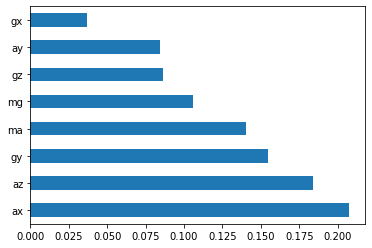

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

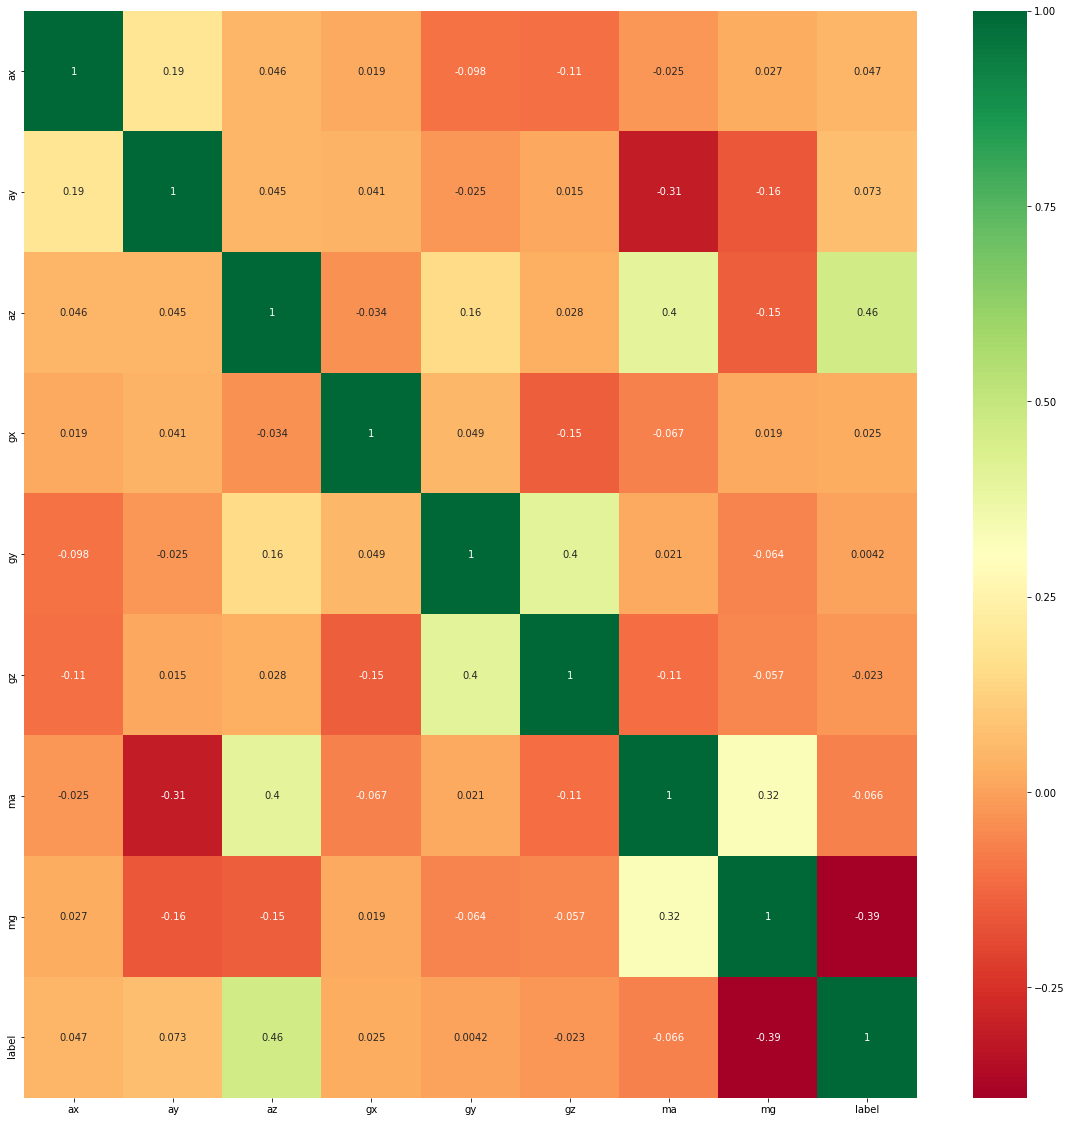

In [8]:
#get correlations of each features in dataset

corrmat = df_cor.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_cor[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
num_feats= len(feature_name)
X.columns.tolist()

['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'ma', 'mg']

In [10]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
        
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
   
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]

    return cor_support, cor_feature, cor_list

cor_support, cor_feature, cor_list = cor_selector(X, y,num_feats)
cor_val=[abs(x) for x in cor_list]
cor_result = dict(zip(cor_feature, cor_val))
myDict = {key:val for key, val in cor_result.items() if val > 0}
{k: v for k, v in sorted(myDict.items(),reverse=True, key=lambda item: item[1])}

{'gx': 0.4632456408438222,
 'az': 0.3912794942615704,
 'gz': 0.07327534075556859,
 'mg': 0.06647050748099155,
 'gy': 0.04670729538952322,
 'ax': 0.02455866796784087,
 'ay': 0.023197501522368973,
 'ma': 0.004171752498676768}

In [11]:
df_plot = copy.deepcopy(df)
df_plot.reset_index(inplace = True) 


       index         ax         ay         az         gx        gy         gz  \
1000    1000  21.708645  38.143179  28.523463  11.322142  7.810475   7.601535   
1001    1001  21.723002  38.143179  28.533034  11.322142  7.810475   7.601535   
1002    1002  21.723002  38.143179  28.533034  11.329469  7.811696   7.666254   
1003    1003  21.703860  38.097716  28.547391  11.329469  7.811696   7.666254   
1004    1004  21.703860  38.097716  28.547391  11.335575  7.817802   7.715098   
...      ...        ...        ...        ...        ...       ...        ...   
14995  14995  18.199755  38.734653  26.836194  10.723093  8.962377  10.605387   
14996  14996  18.199755  38.734653  26.836194  10.575263  9.084550  10.869281   
14997  14997  16.645388  38.681962  26.577531  10.575263  9.084550  10.869281   
14998  14998  20.585195  36.940783  27.609785  12.478719  7.238516   5.785662   
14999  14999  20.106191  36.921623  27.516379  12.478719  7.238516   5.785662   

              ma        mg 

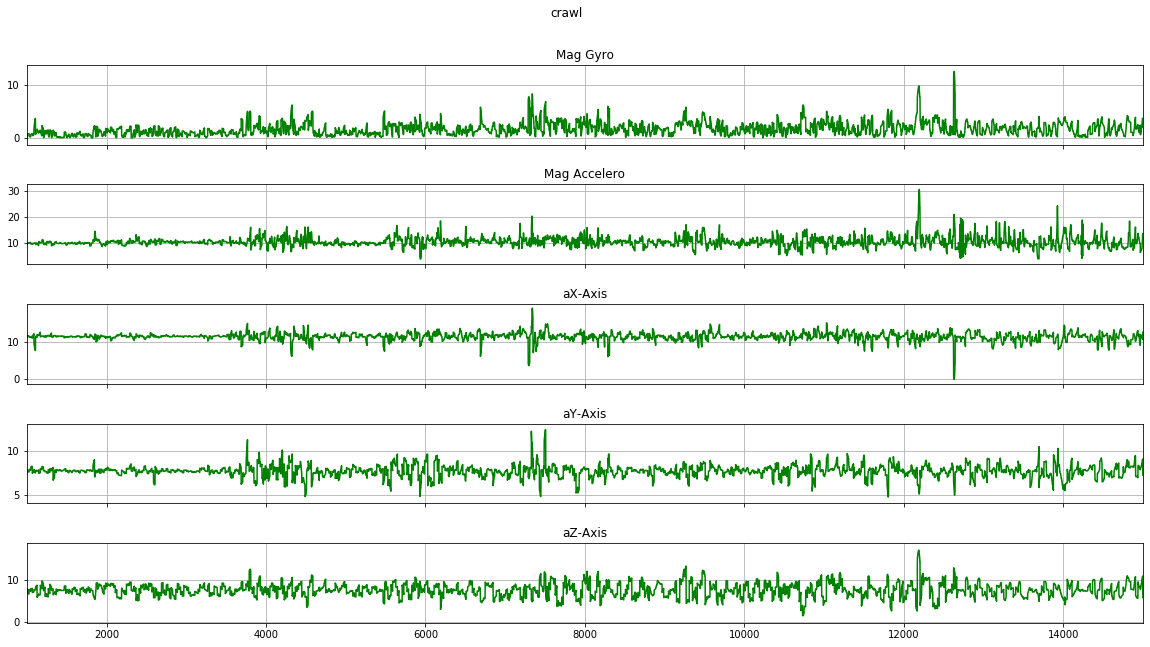

       index         ax         ay         az         gx        gy        gz  \
30286   1000  27.391841  34.227225  31.269375  11.245674  7.697344  7.529293   
30287   1001  27.358311  34.260756  31.235844  11.245674  7.697344  7.529293   
30288   1002  27.341545  34.243991  31.231054  11.245674  7.697344  7.529293   
30289   1003  27.308015  34.208066  31.240635  11.245674  7.697344  7.529293   
30290   1004  27.305620  34.246386  31.269375  11.245674  7.697344  7.529293   
...      ...        ...        ...        ...        ...       ...       ...   
44281  14995  29.413237  41.103327  34.382900  11.406942  7.958794  7.430333   
44282  14996  29.413237  41.103327  34.382900  11.413051  7.953908  7.433998   
44283  14997  29.997622  41.096142  34.188904  11.409385  7.725444  7.435220   
44284  14998  30.031152  41.148832  34.200878  11.409385  7.725444  7.435220   
44285  14999  30.031152  41.148832  34.200878  11.409385  7.738883  7.433998   

             ma        mg            la

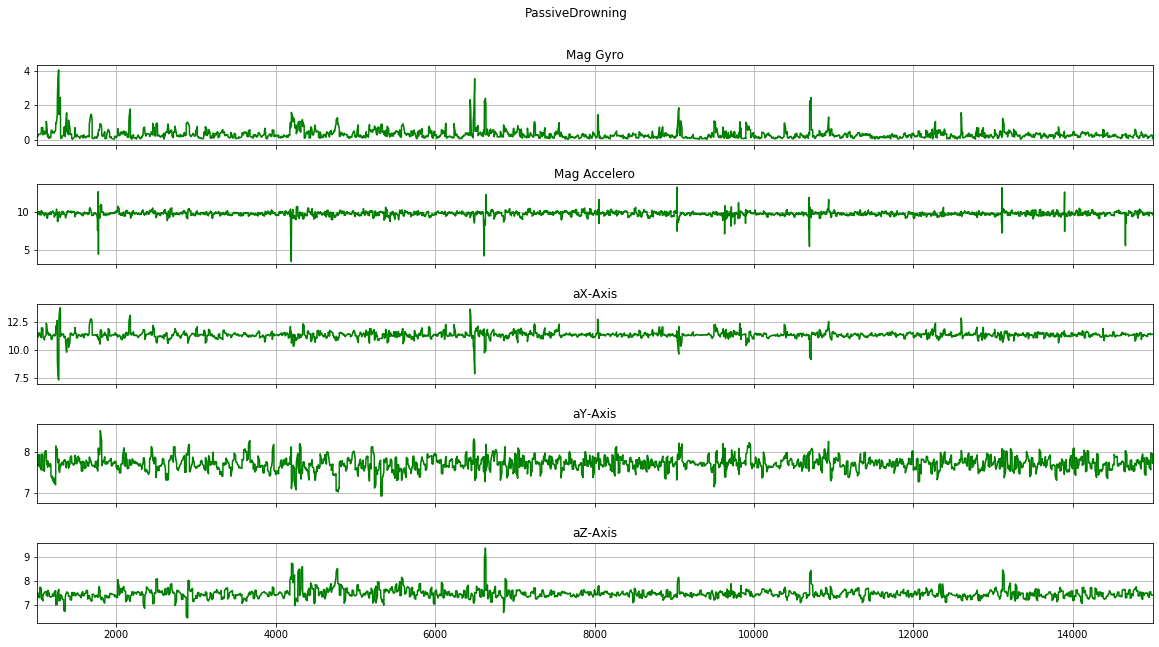

       index         ax         ay         az         gx        gy        gz  \
17000   1000  24.750134  34.646354  37.695213  11.768574  9.785281  7.553728   
17001   1001  24.781269  36.500099  30.881382  13.494879  6.017465  5.974031   
17002   1002  24.764504  36.684516  31.405891  13.494879  6.017465  5.974031   
17003   1003  24.764504  36.684516  31.405891  13.569404  5.997918  6.157290   
17004   1004  24.000493  37.077299  31.434631  13.569404  5.997918  6.157290   
...      ...        ...        ...        ...        ...       ...       ...   
29281  13281  39.529800  36.962338  29.293484  10.130936  7.044496  7.142234   
29282  13282  39.529800  36.962338  29.293484  10.325191  7.200877  7.155673   
29283  13283  39.321433  37.355121  29.125832  10.325191  7.200877  7.155673   
29284  13284  39.321433  37.355121  29.125832  10.699040  7.374363  7.163003   
29285  13285  38.847220  38.169428  28.900700  10.699040  7.374363  7.163003   

              ma        mg           la

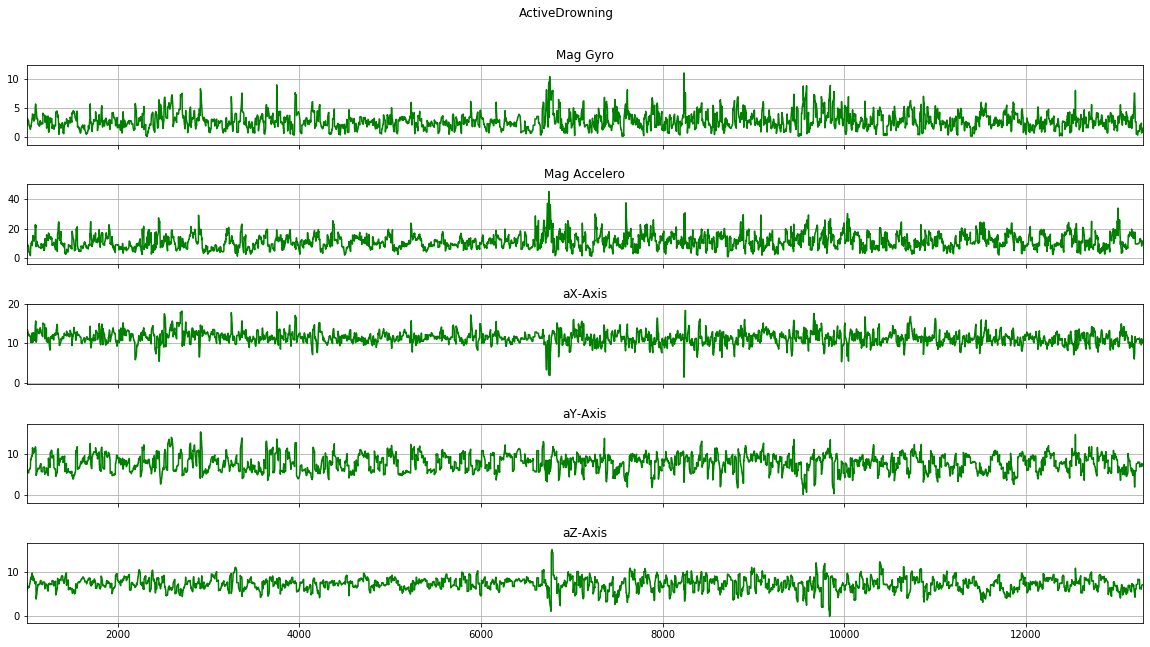

In [12]:
activities = df_plot['label'].value_counts().index
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2,ax3,ax4) = plt.subplots(nrows=5, figsize=(20, 10), sharex=True)
    plot_axis(ax0, data['index'], data['mg'], 'Mag Gyro')
    plot_axis(ax1, data['index'], data['ma'], 'Mag Accelero')
    plot_axis(ax2, data['index'], data['gx'], 'aX-Axis')
    plot_axis(ax3, data['index'], data['gy'], 'aY-Axis')
    plot_axis(ax4, data['index'], data['gz'], 'aZ-Axis')
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
#     ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)
    
Fs=200
for activity in activities:
    data_for_plot = df_plot[(df_plot['label'] == activity)][1000:15000]
    print(data_for_plot)
    print(activity)
    plot_activity(activity, data_for_plot)

# Split training and testing data

In [5]:
def train_test_split(label, ratio):
    split_point = int(len(df[df.label == label]) * ratio)
    return (df[df.label == label].iloc[:split_point, :], df[df.label == label].iloc[split_point:, :])

split_ratio = 0.7
train_data = pd.DataFrame([])
test_data = pd.DataFrame([])

for i in range(len(interesting_labels)):
    (train, test) = train_test_split(interesting_labels[i], split_ratio)
    train_data = pd.concat([train_data, train])
    test_data = pd.concat([test_data, test])

#print("Number of train samples/label: ", len(train_stand))
#print("Number of test samples/label: ", len(test_stand))

# train_data = train_data.iloc[18:,]
# test_data = test_data.iloc[74:,]
print("Number of train samples: ", len(train_data))
print("Number of test samples: ", len(test_data))

#train_label = train_data.iloc[:, 12]
#test_label = test_data.iloc[:, 12]
#train_label = train_label.to_frame()
#test_label = test_label.to_frame()

train_label = train_data['label'].to_frame()
test_label = test_data['label'].to_frame()

Number of train samples:  34500
Number of test samples:  14786


# Data Segmentation (Sliding Window)

In [6]:
N_TIME_STEPS = 100 #sliding window length
STEP = 10 #Sliding window step size
N_FEATURES = 5

def generate_sequence(x, y, n_time_steps, step):
    
    segments = []
    labels = []
    for i in range(200, len(x) - 200, step):
        ax = x['ax'].values[i: i + n_time_steps]
        ay = x['ay'].values[i: i + n_time_steps]
        az = x['az'].values[i: i + n_time_steps]

#         lx = x['lx'].values[i: i + n_time_steps]
#         ly = x['ly'].values[i: i + n_time_steps]
#         lz = x['lz'].values[i: i + n_time_steps]
        gx = x['gx'].values[i: i + n_time_steps]
        gy = x['gy'].values[i: i + n_time_steps]
        gz = x['gz'].values[i: i + n_time_steps]

# #         mx = x['mx'].values[i: i + n_time_steps]
# #         my = x['my'].values[i: i + n_time_steps]
# #         mz = x['mz'].values[i: i + n_time_steps]
        
        #ma =  x['ma'].values[i: i + n_time_steps]
        mg =  x['mg'].values[i: i + n_time_steps]
#         ml =  x['ml'].values[i: i + n_time_steps]
#         mm =  x['mm'].values[i: i + n_time_steps]
                
       
        label = stats.mode(y['label'][i: i + n_time_steps])[0][0]
#         segments.append([ax, ay, az, gx, gy, gz, lx, ly, lz, mx, my, mz, ma, mg, ml, mm])
#         segments.append([ax, ay, az, gx, gy, gz, mx, my, mz])
        segments.append([az, gx,gy,gz,mg])
        labels.append(label)
        
    return segments, labels

train_X, train_y = generate_sequence(train_data, train_label, N_TIME_STEPS, STEP)
test_X, test_y = generate_sequence(test_data, test_label, N_TIME_STEPS, STEP)

In [7]:
# reshape input segments and one-hot encode labels
def reshape_segments(x, y, n_time_steps, n_features):
    
    x_reshaped = np.asarray(x, dtype= np.float32).reshape(-1, n_time_steps, n_features)
    y_reshaped = np.asarray(pd.get_dummies(y), dtype = np.float32)
    return x_reshaped, y_reshaped

X_train, y_train = reshape_segments(train_X, train_y, N_TIME_STEPS, N_FEATURES)
X_test, y_test = reshape_segments(test_X, test_y, N_TIME_STEPS, N_FEATURES)

In [8]:
y_test

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

# Import DL Library

In [9]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Bidirectional, Input
from tensorflow.keras.layers import Attention
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import backend as K
from tensorflow.python.tools import freeze_graph
from tensorflow.python.tools import optimize_for_inference_lib

N_CLASSES = 3
#N_HIDDEN_UNITS = 32
L2 = 0.000001

Using TensorFlow backend.


# LSTM Model (Training) 

In [14]:
# LSTM model
from keras.backend import clear_session
from keras.callbacks import EarlyStopping, ModelCheckpoint

clear_session()
model = Sequential()
# model.add(Embedding(max_words, emb_dim, input_length=max_len))
# model.add(attention(return_sequences=True)) # receive 3D and output 3D
# model.add(LSTM(8, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2)))
# model.add(Dropout(0.2))

model.add(LSTM(8, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
         kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
         bias_regularizer=l2(L2)))
# model.add(Dropout(0.2))

# model.add(Bidirectional(LSTM(8, dropout=0.3,return_sequences=True)))
# model.add(LSTM(32, return_sequences=True))

# model.add(Bidirectional(LSTM(16, return_sequences=True)))

model.add(Flatten(name='Flatten'))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2)))
model.add(Dropout(0.3))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2)))
model.add(Dropout(0.5))
model.add(Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2)))

#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_1"),
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), 
#          kernel_initializer='orthogonal', kernel_regularizer=l2(L2), recurrent_regularizer=l2(L2),
#          bias_regularizer=l2(L2), name="LSTM_2"),
#     Dropout(0.2),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', kernel_regularizer=l2(L2), bias_regularizer=l2(L2), name="Dense_2")
# ])

# model = Sequential([
#     LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_1"),
#      LSTM(N_HIDDEN_UNITS, return_sequences=True, input_shape=(N_TIME_STEPS, N_FEATURES), name="LSTM_2"),
#     Flatten(name='Flatten'),
#     Dense(N_HIDDEN_UNITS, activation='relu', name="Dense_1"),
#     Dense(N_CLASSES, activation='softmax', name="Dense_2")
# ])

model.summary()

opt = optimizers.Nadam(lr=1e-3, schedule_decay=1e-5)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=15, restore_best_weights=True)

# model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
#             filepath="./best_model.hdf5", 
#             monitor='val_acc', 
#             verbose=1, 
#             save_best_only=True,
#             save_weights_only=False, 
#             mode='max')

model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

BATCH_SIZE = 32
N_EPOCHS = 300

lstm = model.fit(X_train, y_train,
            batch_size=BATCH_SIZE, epochs=N_EPOCHS, 
            callbacks=[early_stopping],
            validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 8)            448       
_________________________________________________________________
Flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 6408      
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
__________

3410/3410 [==============================] - 15s 4ms/step - loss: 0.3644 - acc: 0.8806 - val_loss: 0.3438 - val_acc: 0.8853
Epoch 50/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3678 - acc: 0.8833 - val_loss: 0.3187 - val_acc: 0.8916
Epoch 51/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3631 - acc: 0.8786 - val_loss: 0.3952 - val_acc: 0.8332
Epoch 52/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3742 - acc: 0.8663 - val_loss: 0.3424 - val_acc: 0.8784
Epoch 53/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3575 - acc: 0.8827 - val_loss: 0.3359 - val_acc: 0.8833
Epoch 54/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3728 - acc: 0.8798 - val_loss: 0.3375 - val_acc: 0.8812
Epoch 55/300
3410/3410 [==============================] - 15s 4ms/step - loss: 0.3457 - acc: 0.8886 - val_loss: 0.3449 - val_acc: 0.8874
Epoch 56/300
3410/3410 [==============================

[2 2 2 ... 1 1 1]


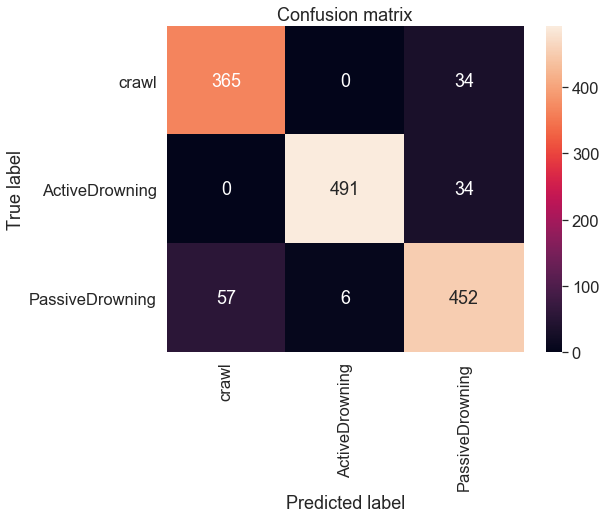

0.9089645582242837


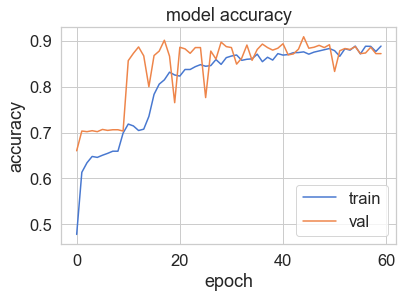

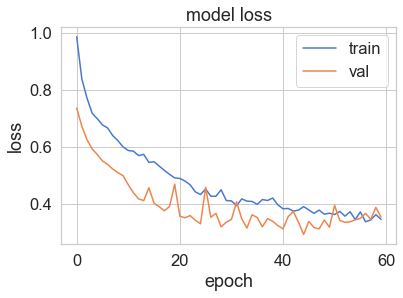

In [15]:
# use LSTM model to predict

y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)
print(y_true_labels)
LABELS = ['crawl','ActiveDrowning','PassiveDrowning']

plt.figure(figsize=(8, 6))
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True label')
# plt.ylim((16,14))
plt.xlabel('Predicted label')
plt.show();

print(max(lstm.history['val_acc']))
plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

plt.plot(lstm.history['loss'])
plt.plot(lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

# Save the model into .pb file

In [21]:
# N_TIME_STEPS = 100 #sliding window length
# STEP = 20 #Sliding window step size
# N_FEATURES = 8


In [16]:
# Save LSTM model

output_node_name = "dense_4/Softmax"
MODEL_LSTM = str(N_TIME_STEPS)+"_"+str(STEP)+"_"+str(N_FEATURES)+"_"+str(N_CLASSES)

tf.train.write_graph(K.get_session().graph_def, './models/LSTM/', \
        MODEL_LSTM + '_graph.pbtxt')
saver = tf.train.Saver()
saver.save(K.get_session(), './models/LSTM/' + MODEL_LSTM + '.chkp')

freeze_graph.freeze_graph('./models/LSTM/' +MODEL_LSTM+ '_graph.pbtxt', None, \
    False, './models/LSTM/' + MODEL_LSTM+ '.chkp', output_node_name, \
    "save/restore_all", "save/Const:0", \
    './models/LSTM/' +MODEL_LSTM + '.pb', True, "")



Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./models/LSTM/100_10_5_3.chkp
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 11 variables.
INFO:tensorflow:Converted 11 variables to const ops.


node {
  name: "keras_learning_phase/input"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_BOOL
        tensor_shape {
        }
        bool_val: false
      }
    }
  }
}
node {
  name: "keras_learning_phase"
  op: "PlaceholderWithDefault"
  input: "keras_learning_phase/input"
  attr {
    key: "dtype"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "lstm_1_input"
  op: "Placeholder"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "shape"
    value {
      shape {
        dim {
          size: -1
        }
        dim {
          size: 100
        }
        dim {
          size: 5
        }
      }
    }
  }
}
node {
  name: "lstm_1/kernel"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
  

# CNN Model 

In [23]:
# from keras.backend import clear_session

# clear_session()
# # CNN model

# model = Sequential()

# model.add(Conv2D(N_HIDDEN_UNITS * 3, kernel_size = 3, input_shape = (X_train.shape[1], X_train.shape[2], 1), padding = 'same',
#                  activation = 'relu', name="Conv2D_Layer1"))
# model.add(Conv2D(N_HIDDEN_UNITS * 2, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer2"))
# model.add(Conv2D(N_HIDDEN_UNITS, kernel_size = 3, padding = 'same', activation = 'relu', name="Conv2D_Layer3"))
# model.add(Flatten(name="Flatten_Layer"))
# model.add(Dense(N_CLASSES, activation = 'softmax', name="CNN_output"))

# model.summary()

# model.compile(optimizer='Adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# BATCH_SIZE = 24
# N_EPOCHS = 100

# cnn = model.fit(np.expand_dims(X_train, axis=-1), y_train,
#                 batch_size=BATCH_SIZE, epochs=N_EPOCHS,
#                 validation_data=(np.expand_dims(X_test, axis=-1), y_test))

In [24]:
# model.save("model_har.h5")

In [25]:
# y_pred_ohe = model.predict(np.expand_dims(X_test, axis=-1))
# y_pred_labels = np.argmax(y_pred_ohe, axis=1)
# y_true_labels = np.argmax(y_test, axis=1)
# confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)

# LABELS = [ 'standing', 'walking']

# plt.figure(figsize=(8, 6))
# sns.set(style='whitegrid', palette='muted', font_scale=1.5)
# sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
# plt.title("CNN Result Confusion Matrix")
# plt.ylabel('True label')
# # plt.ylim((16,14))
# plt.xlabel('Predicted label')
# plt.show();

# plt.plot(cnn.history['acc'])
# plt.plot(cnn.history['val_acc'])
# plt.title('CNN model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# plt.plot(cnn.history['loss'])
# plt.plot(cnn.history['val_loss'])
# plt.title('CNN model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'val'], loc='best')
# plt.show()

# Save model to .pb file

In [26]:
# # Save CNN model
# output_node_name = "CNN_output/Softmax"
# MODEL_NAME = "2020_02_09_CNN"

# tf.train.write_graph(K.get_session().graph_def, './models/CNN/', \
#         MODEL_NAME + '_graph.pbtxt')
# saver = tf.train.Saver()
# saver.save(K.get_session(), './models/CNN/' + MODEL_NAME + '.chkp')

# freeze_graph.freeze_graph('./models/CNN/' + MODEL_NAME + '_graph.pbtxt', None, \
#     False, './models/CNN/' + MODEL_NAME + '.chkp', output_node_name, \
#     "save/restore_all", "save/Const:0", \
#     './models/CNN/' + MODEL_NAME + '.pb', True, "")

# Convert .pb to tflite

In [27]:
# import tensorflow as tf
# # model_dir='./models/CNN/2020_02_09_CNN.pb'
# model_dir='model_har.h5'

# input_arrays = ['Conv2D_Layer1_input']
# output_arrays = ['CNN_output/Softmax']

# tfc = tf.lite.TFLiteConverter.from_keras_model_file(model_dir)
# # converter =  tfc.from_keras_model_file(model_dir, input_arrays, output_arrays)

# tflite_model = tfc.convert()
# open("CNN_model.tflite","wb").write(tflite_model)

# Make sure the model output and input name

In [28]:
# import tensorflow as tf
# gf = tf.GraphDef()   
# m_file = open(r"D:\Human Activity Recognition\Training\models\LSTM\100_12_walk_stand.pb",'rb')
# gf.ParseFromString(m_file.read())

# with open('somefile.txt', 'a') as the_file:
#     for n in gf.node:
#         the_file.write(n.name+'\n')

# file = open('somefile.txt','r')
# data = file.readlines()
# print ("output name = ")
# print (data[len(data)-1])

# print ("Input name = ")
# file.seek ( 0 )
# print (file.readline())